In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test

In [2]:
!ls *.csv

diffx_epithelial_spliced.csv
tumor_nearest_neighbor_latent_time_AllNormalSamples_v1.csv
tumor_nearest_neighbor_latent_time_AllNormalSamples_v2.csv
tumor_nearest_neighbor_latent_time_NormalSampleA.csv


In [3]:
nn_lt = pd.read_csv("tumor_nearest_neighbor_latent_time_AllNormalSamples_v2.csv", index_col=0, header=0)
nn_lt

,SubType_combined,nn_latent_time,nn_barcodes,nearest_normal_type
B1__AAACCCAAGAGTAACT,CDH12_CDH18_Epithelial,0.224133,D__GAGCCTGCAATCCTTT,Normal_CDH12
B1__AAACCCAAGCGGACAT,CDH12_CDH18_Epithelial,0.193314,D__GGCTTGGCAAATTGCC,Normal_CDH12
B1__AAACCCAAGTGCCGAA,KRT_Epithelial,0.849366,A__ATGAGTCGTTGACGGA,Normal_Umbrella_Intermediate
B1__AAACCCACAAAGAGTT,DSG3_Epithelial,0.145237,D__TTCTAGTAGAGATTCA,Normal_CDH12
B1__AAACCCACAAGCTACT,KRT_Epithelial,0.680381,A__TCCTCCCTCAAGAGTA,Normal_Umbrella_Intermediate
...,...,...,...,...
B8B__TTTCACAAGGTTCCGC,CDH12_CDH18_Epithelial,0.125478,D__ATGGAGGAGCGTGCCT,Normal_CDH12
B8B__TTTCATGTCACTCCGT,CDH12_CDH18_Epithelial,0.211906,D__AGGGAGTTCTTAGGAC,Normal_CDH12
B8B__TTTCCTCTCACCTGTC,Proliferating_Epithelial,0.392664,C__TTCCTCTCAACGGCTC,Normal_CDH12
B8B__TTTCGATAGAATTCAG,KRT_Epithelial,0.193696,D__AACCAACTCGTGGCGT,Normal_CDH12


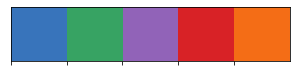

In [47]:
tumor_colors = {
    'CDH12_CDH18_Epithelial': '#3874BB',
    'DSG3_Epithelial': '#37A363',
    'Intermediate_Epithelial': '#9163B8', 
    'KRT_Epithelial': '#D82226',
    'Proliferating_Epithelial': '#F46D16'
}
sns.palplot([v for k, v in tumor_colors.items()])

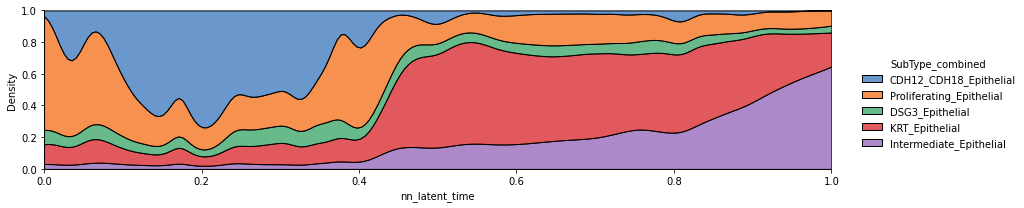

In [66]:
sns.displot(nn_lt, x='nn_latent_time', hue='SubType_combined', 
#             kind='ecdf', 
#             kind='kde', 
            kind='kde', 
            multiple='fill',
#             common_norm=True,
#             common_grid=True,
#             cumulative=True,
            fill=True,
            clip=[0,1],
            height=3,
            aspect=4,
            palette=tumor_colors,
            hue_order=[
                'CDH12_CDH18_Epithelial', 
                'Proliferating_Epithelial',
                'DSG3_Epithelial',
                'KRT_Epithelial',
                'Intermediate_Epithelial', 
            ]
           )

plt.savefig('figures/kde_filled_tumor.svg', bbox_inches='tight')

In [56]:
paths = [
#     f'figures/scvelo_timevectors_normal{library}.csv',
    'figures/scvelo_timevectors_normalA.csv',
    'figures/scvelo_timevectors_normalB.csv',
    'figures/scvelo_timevectors_normalC.csv',
    'figures/scvelo_timevectors_normalD.csv',
]
normal_time = []
for pth in paths:
    x = pd.read_csv(pth, index_col=0, header=0)
    normal_time.append(x.copy())
    
normal_time = pd.concat(normal_time, axis=0)
print(normal_time.shape)

obs = pd.read_csv('../normal/normal_bladder_obs.csv', index_col=0, header=0)
subtype_col = 'SubType_Normal'
normal_time['subtype'] = obs.loc[normal_time.index, subtype_col]
normal_time


(12819, 2)


,velocity_pseudotime,latent_time,subtype
A__AACACACCAAAGCTCT,0.994248,0.752954,Normal_Umbrella_Intermediate
A__AAAGGTACAAGGCGTA,0.981214,0.711687,Normal_Basal_Intermediate
A__AAAGGGCGTGGGATTG,0.989378,0.703129,Normal_Umbrella_Intermediate
A__AACAAGAAGATGGTAT,0.454420,0.126090,Normal_KRT7_KRT13_Basal
A__AAAGAACGTGCATGAG,0.991021,0.750117,Normal_Umbrella_Intermediate
...,...,...,...
D__TTTGGTTTCCACTGAA,0.358171,0.674326,Normal_Basal_Intermediate
D__TTTGGTTGTATGGTAA,0.439041,0.819907,Normal_Umbrella_Intermediate
D__TTTGACTGTCAAGCCC,0.622234,0.766350,Normal_Basal_Intermediate
D__TTTGTTGTCGCTTGCT,0.188469,0.148580,Normal_CDH12


In [57]:
np.unique(normal_time.subtype)

array(['Normal_Basal_Intermediate', 'Normal_CDH12',
       'Normal_KRT7_KRT13_Basal', 'Normal_Umbrella_Intermediate'],
      dtype=object)

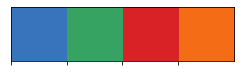

In [61]:
normal_colors = {
    'Normal_Basal_Intermediate': '#3874BB', #blue
    'Normal_KRT7_KRT13_Basal': '#37A363', # green
    'Normal_Umbrella_Intermediate': '#D82226', # red
    'Normal_CDH12': '#F46D16' # orange
}
sns.palplot([v for k, v in normal_colors.items()])

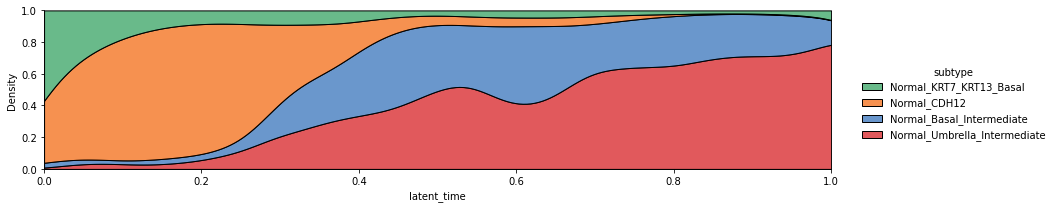

In [65]:
sns.displot(normal_time, x='latent_time', hue='subtype', 
#             kind='ecdf', 
#             kind='kde', 
            kind='kde', 
            multiple='fill',
#             common_norm=True,
#             common_grid=True,
#             cumulative=True,
            fill=True,
            clip=[0,1],
            height=3,
            aspect=4,
            palette=normal_colors,
            hue_order=[
                'Normal_KRT7_KRT13_Basal', 
                'Normal_CDH12',
                'Normal_Basal_Intermediate',
                'Normal_Umbrella_Intermediate',
            ]
           )
plt.savefig('figures/kde_filled_normal.svg', bbox_inches='tight')

In [5]:
def calc_signature(bulk, signature, signature_name='gene_set'):
    sig = pd.DataFrame(index=bulk.columns, columns=[signature_name], dtype=float)
    signature = [g for g in signature if g in bulk.index]
    for i in bulk.columns:
        vals = bulk.loc[signature, i]
        sig.loc[i, signature_name] = np.mean(vals)
    return sig

time_genes = pd.read_csv("Time_gene_signatures.csv", header=0)
bulk = pd.read_csv('BLCA_matched_RNAseq_counts_unique_genes.csv', index_col=0, header=0)
library_size = bulk.sum(axis=0)
for i in bulk.columns:
    bulk.loc[:, i] = bulk.loc[:,i] / (library_size[i]/1000000)
bulk = np.log1p(bulk)

scores = []
for c in np.unique(time_genes.subtype):
    genes = time_genes.query("subtype == @c").gene.tolist()
    scores.append(calc_signature(bulk, genes, signature_name = c))
scores = pd.concat(scores, axis=1) 

scores

,time_0,time_1,time_2,time_3,time_4
TCGA-ZF-AA4U-01A-11R-A38B-07,0.793647,1.798989,3.475417,3.866793,4.271553
TCGA-G2-AA3C-01A-21R-A39I-07,0.950710,2.997654,2.743826,2.909814,2.844741
TCGA-FD-A3SM-01A-11R-A22U-07,1.114113,3.191209,3.395853,3.840902,3.970536
TCGA-XF-A8HG-01A-11R-A36F-07,0.686545,1.548459,3.351248,4.099623,4.172289
TCGA-FD-A6TE-01A-12R-A33J-07,0.828398,1.952408,3.617682,4.138768,4.257408
...,...,...,...,...,...
TCGA-UY-A78P-01A-12R-A36F-07,1.075428,3.049913,3.365097,3.505609,3.868516
TCGA-ZF-A9RF-01A-11R-A38B-07,0.932724,2.606480,3.064993,3.465762,3.500166
TCGA-FD-A3B8-01A-31R-A20F-07,1.433120,4.776791,3.460400,3.640331,3.658968
TCGA-FD-A43P-01A-31R-A23W-07,1.231503,2.871734,3.441054,3.959675,4.146884


In [13]:
# These samples have duplicate RNAseq. We use the sample with more read depth.
remove_barcodes = ['TCGA-BL-A13J-01B-04R-A277-07',
                   'TCGA-BL-A13J-01A-11R-A10U-07',
                   'TCGA-BL-A13I-01A-11R-A277-07',
                   'TCGA-BL-A13I-01B-04R-A277-07']
scores = scores.loc[~scores.index.isin(remove_barcodes)]
barcodes = ['-'.join(b.split('-')[:3]) for b in scores.index]
scores.index = barcodes

TCGA_cdr = pd.read_csv("TCGA_cdr.csv", index_col='bcr_patient_barcode', header=0)

cols = [
    'type', 'OS', 'OS.time', 'DSS', 'DSS.time'
]
BLCA_cdr = TCGA_cdr.loc[TCGA_cdr['type']=='BLCA', cols]
BLCA_cdr = BLCA_cdr.loc[scores.index, :]
BLCA_cdr

,type,OS,OS.time,DSS,DSS.time
TCGA-ZF-AA4U,BLCA,1.0,262.0,1.0,262.0
TCGA-G2-AA3C,BLCA,1.0,211.0,1.0,211.0
TCGA-FD-A3SM,BLCA,1.0,547.0,1.0,547.0
TCGA-XF-A8HG,BLCA,1.0,467.0,1.0,467.0
TCGA-FD-A6TE,BLCA,0.0,376.0,0.0,376.0
...,...,...,...,...,...
TCGA-UY-A78P,BLCA,0.0,2380.0,0.0,2380.0
TCGA-ZF-A9RF,BLCA,0.0,1949.0,0.0,1949.0
TCGA-FD-A3B8,BLCA,0.0,384.0,0.0,384.0
TCGA-FD-A43P,BLCA,0.0,832.0,0.0,832.0


In [14]:
# Create data for KM plots
event_col = 'DSS'
time_col = 'DSS.time'

rm_rows = pd.isna(BLCA_cdr[event_col]) | pd.isna(BLCA_cdr[time_col])

event = BLCA_cdr.loc[~rm_rows, event_col] == 1
time = np.array(BLCA_cdr.loc[~rm_rows, time_col], dtype=np.float32) / 365

km_data = scores.loc[~rm_rows, :].copy()
km_data['Event'] = event
km_data['Time'] = time

km_data

,time_0,time_1,time_2,time_3,time_4,Event,Time
TCGA-ZF-AA4U,0.793647,1.798989,3.475417,3.866793,4.271553,True,0.717808
TCGA-G2-AA3C,0.950710,2.997654,2.743826,2.909814,2.844741,True,0.578082
TCGA-FD-A3SM,1.114113,3.191209,3.395853,3.840902,3.970536,True,1.498630
TCGA-XF-A8HG,0.686545,1.548459,3.351248,4.099623,4.172289,True,1.279452
TCGA-FD-A6TE,0.828398,1.952408,3.617682,4.138768,4.257408,False,1.030137
...,...,...,...,...,...,...,...
TCGA-UY-A78P,1.075428,3.049913,3.365097,3.505609,3.868516,False,6.520548
TCGA-ZF-A9RF,0.932724,2.606480,3.064993,3.465762,3.500166,False,5.339726
TCGA-FD-A3B8,1.433120,4.776791,3.460400,3.640331,3.658968,False,1.052055
TCGA-FD-A43P,1.231503,2.871734,3.441054,3.959675,4.146884,False,2.279452


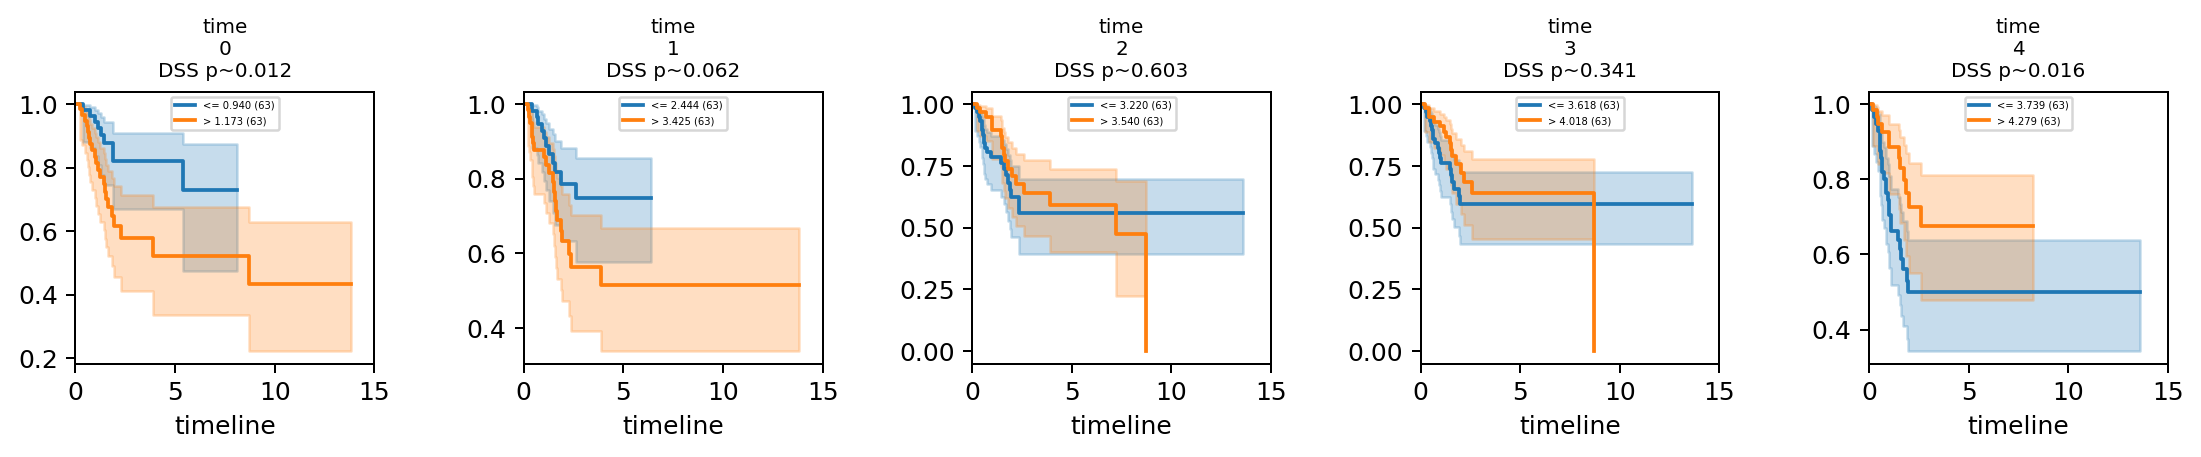

In [21]:
fig, axs = plt.subplots(1,5, figsize=(15, 2), dpi=180, gridspec_kw=dict(hspace=1, wspace=0.5))
axs = axs.ravel()
for c, ax in zip(scores.columns, axs):
    c_vals = km_data.loc[:, c].values
    q25, q75 = np.quantile(c_vals, [0.25, 0.75])
    g25 = c_vals <= q25
    g75 = c_vals > q75
    n25 = g25.sum()
    n75 = g75.sum()

    T1 = km_data.loc[g25, 'Time']
    E1 = km_data.loc[g25, 'Event']
    T2 = km_data.loc[g75, 'Time']
    E2 = km_data.loc[g75, 'Event']
    
    kmf = KaplanMeierFitter()
    kmf.fit( T1, E1, label=f'<= {q25:0.3f} ({n25})')
    kmf.plot(ax = ax)
    kmf.fit( T2, E2, label=f'> {q75:0.3f} ({n75})')
    kmf.plot(ax = ax)

    res = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
    ax.set_xlim([0, 15])
    c_title = c.replace('_', '\n')
    ax.set_title(f'{c_title}\n{event_col} p~{res.p_value:3.3f}', fontsize=8)
    ax.legend(loc='upper center', fontsize=4)